In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from math import sqrt
from scipy.special import factorial
from sympy import integrate, init_printing
init_printing(use_latex="mathjax")
from scipy.special import kv
import cmath
from math import sqrt, pi, factorial, exp 

# Capítulo 6

## Problema 3

Implement Lagrange interpolation without the barycentric formula, i.e., the slow way, as per Eq. (6.22) and Eq. (6.19); use the same data as in barycentric.py.

### Solución

La ecuación (6.19) es:

$$ L_k(x)=\frac {\Pi_{j=0,j\neq k}^{n-1}(x-x_j)}{\Pi_{j=0,j\neq k}^{n-1}(x_k-x_j)} $$

Y la ecuación (6.22):

$$p(x)=\sum_{k=0}^{n-1}y_kL_k(x) $$

In [2]:
#Primero definimos la función que queremos aproximar
def f(x):
    return 1/(1+25*x**2)

#Luego definimos los datos que vamos a aproximar

def generatedata(n,f,nodes="cheb"): 
    if nodes=="cheb":
        dataxs = -np.cos(np.linspace(0,np.pi,n)) 
    else:
        dataxs = np.linspace(-1,1,n)
    datays = f(dataxs)
    return dataxs, datays

#Definimos una función para los polinomios de Lagrange

def weights(dataxs):
    n= len(dataxs)
    ws=np.ones(n)
    for k in range(n):
        for j in range(n):
            if j==k:
                continue 
            ws[k] *= (dataxs[k]-dataxs[j])
    return 1/ws

def numerador(x,dataxs):
    n= len(dataxs)
    nume=np.ones(n)
    for k in range(n):
        for j in range(n):
            if j==k:
                continue 
            nume[k] *= (x[k]-dataxs[j])
    return nume

def pol(x,dataxs,datays):
    lag = list(map(lambda x,y,z: x*y*z, numerador(x,dataxs), weights(dataxs),datays))
    suma= sum(lag)
    return suma

dataxs, datays = generatedata(15, f)
x= [0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]

print(pol(x,dataxs,datays))

0.2592750581841138


## Problema 6

Implement Lagrange interpolation with the nodes being the roots of Legendre polynomials, given by legroots.py. Plot n = 7 and n = 15 for Runge’s function.

In [3]:
#Primero importamos el codigo para las raices de los polinomios de Legendre

def legendre(n,x):
    if n==0:
        val2 = 1.
        dval2 = 0.
    elif n==1:
        val2 = x
        dval2 = 1.
    else:
        val0 = 1.; val1 = x 
        for j in range(1,n):
            val2 = ((2*j+1)*x*val1 - j*val0)/(j+1)
            val0, val1 = val1, val2 
        dval2 = n*(val0-x*val1)/(1.-x**2)
    return val2, dval2

def legnewton(n,xold,kmax=200,tol=1.e-8): 
    for k in range(1,kmax):
        val, dval = legendre(n,xold)
        xnew = xold - val/dval
             
        xdiff = xnew - xold
        if abs(xdiff/xnew) < tol:
            break
        
        xold = xnew
    else:
        xnew = None
    return xnew

def legroots(n):
    roots = np.zeros(n)
    npos = n//2
    for i in range(npos):
        xold = np.cos(np.pi*(4*i+3)/(4*n+2)) 
        root = legnewton(n,xold)
        roots[i] = -root
        roots[-1-i] = root
    return roots

if __name__ =="__main__":
    roots = legroots(9); print(roots)



[-0.96816024 -0.83603111 -0.61337143 -0.32425342  0.          0.32425342
  0.61337143  0.83603111  0.96816024]


In [4]:
#Ahora implementamos la funcion escrita en el problema anterior

def generatedata(n,f,nodes="legroots"): 
    if nodes=="legroots":
        dataxs = legroots(n)
    else:
        dataxs = np.linspace(-1,1,n)
    datays = f(dataxs)
    return dataxs, datays

def bary(dataxs,datays,ws,x):
    k = np.where(x == dataxs)[0] 
    if k.size == 0:
        nume = np.sum(ws*datays/(x-dataxs)) 
        denom = np.sum(ws/(x-dataxs))
        val = nume/denom
    else:
        val = datays[k[0]]
    return val


In [5]:
def datos(n,x):
    dataxs, datays = generatedata(n, f)
    ws = weights(dataxs)
    pofx = bary(dataxs, datays, ws, x) 
    return pofx

x1=np.linspace(-1,1,9)
lista1=[datos(9,i) for i in x1]
x2=np.linspace(-1,1,15)
lista2=[datos(15,i) for i in x2]
print(x1)
print(lista1)
print(x2)
print(lista2)

[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.  ]
[0.27054759207859225, 0.1596323350044399, 0.026443896140027463, 0.49434151526935965, 1.0, 0.49434151526935965, 0.026443896140027432, 0.15963233500443993, 0.2705475920785923]
[-1.         -0.85714286 -0.71428571 -0.57142857 -0.42857143 -0.28571429
 -0.14285714  0.          0.14285714  0.28571429  0.42857143  0.57142857
  0.71428571  0.85714286  1.        ]
[-0.049715296156843655, 0.04411844281462516, 0.06623173266368793, 0.10885564468141239, 0.199536133405742, 0.2853395808500059, 0.6972620343138194, 1.0, 0.6972620343138197, 0.2853395808500063, 0.19953613340574197, 0.10885564468141234, 0.06623173266368787, 0.044118442814625375, -0.049715296156843655]


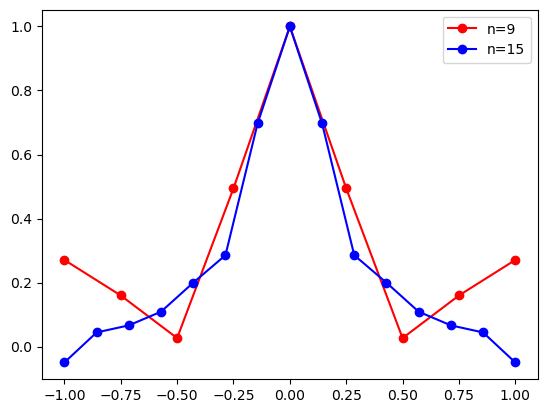

In [6]:
plt.plot(x1,lista1,"ro-",label="n=9")
plt.plot(x2,lista2,"bo-",label="n=15")
plt.legend()
plt.show()

## Problema 9

We will now see how Lagrange interpolation can be used to recover finite-difference formulas like those we encountered all the way back in chapter 3. Apply the error formula of Eq. (6.38) for the case of n = 3, i.e., for the Lagrange polynomials of Eq. (6.20). Differentiate this equation with respect to $x^*$ and then take $x^* = x_0$, $x_1 = x_0 + h$, and $x_2 = x_0 + 2h$. Compare your final answer with Eq. (3.27).

### Solución

La ecuación 6.20 es:

$$ L_0(x)=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} \text{ , } L_1(x)=\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} \text{ , } L_2(x)=\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}$$

La ecuación 6.38 es:

$$ f(x^{*})=p(x^{*})+\frac{f^{(n)}(\xi)}{n!}\Pi_{j=0}^{n-1}(x^{*}-x_j) $$

Y la ecuación 3.27 es:

$$f'(x)=\frac{4f(x+h/2)-f(x+h)-3f(x)}{h}+\frac{h^2}{12}f^{(3)}(x)+...$$

primero desarrollamos la ecuación 6.38 para n=3:

$$ f(x^{*})=p(x^{*})+\frac{f^{(3)}(\xi)}{6}(x^{*}-x_0)(x^{*}-x_1)(x^{*}-x_2) $$

derivamos

$$ f'(x^{*})=p'(x^{*})+\frac{f^{(3)}(\xi)}{6}\left( (1-x_0)(x^{*}-x_1)(x^{*}-x_2)+ (x^{*}-x_0)(1-x_1)(x^{*}-x_2) (x^{*}-x_0)(x^{*}-x_1)(1-x_2)\right)$$

nos pide evaluar $x^{*}=x_0$, $x_1=x_0+h$, $x_2=x_0+2h$

$$ f'(x_0)=p'(x_0)+\frac{f^{(3)}(\xi)}{6}\left( (1-x_0)(x_0-x_0-h)(x_0-x_0-2h) \right) $$

$$ f'(x_0)=p'(x_0)+\frac{f^{(3)}(\xi)}{6}\left( (1-x_0)(2h^2) \right) $$

finalmente

$$ f'(x_0)=p'(x_0)+\frac{f^{(3)}(\xi)}{3}\left( (1-x_0)(h^2) \right) $$

## Problema 12

You were asked to (and could)solve problem 6.11 analytically. The present problem will address the more general case where an automated approach pays off.

(a) Some scaffolding: take the logarithm of Eq. (6.19) and differentiate, to show:

$$L'_k(x)=L_k(x)\sum_{j=0,j\neq k}^{n-1}\frac{1}{x-x_j}$$

(b) Taking $x=x_k$ in Eq. (6.241) you now have an expression for $L'_k(x_k)$. Combined with Eq. (6.19), which gives you $L_k(x)$, you now have everything you need to implement Hermite interpolation in general, see Eq. (6.49). Test your function for the $x_k’s$ −1, −0.5, 0, 0.5, 1, the $y_k’s$ 1, 1.72265625, 2, 1.78515625, 3, and the $y'_k$'s −1, 1.25, 0, −0.625, 11 for a large number of $x’s$ (between −1 and +1), comparing with the function $f(x) = x^8 + x^5 − x^2 + 2$.

### Solución

***Inciso (a)*** 

La ec. (6.12) es:

$$ L_k(x)=\frac {\Pi_{j=0,j\neq k}^{n-1}(x-x_j)}{\Pi_{j=0,j\neq k}^{n-1}(x_k-x_j)} $$

derivando el logaritmo de $L_k(x)$

$$\frac{ln(L_k(x))}{dx}=\frac{1}{L_k(x)}\frac{dL_k(x)}{dx}$$

despejando

$$L'_k(x)=L_k(x)\frac{dln(L_k(x))}{dx}$$

derivando explicitamente el logaritmo natural 

$$lnL_k(x)=ln\Pi_{j=0,j\neq k}^{n-1}(x-x_j)-ln\Pi_{j=0,j\neq k}^{n-1}(x_k-x_j)=\sum_{j=0,j\neq k}^{n-1}ln(x-x_j)-\sum_{j=0,j\neq k}^{n-1}ln(x_k-x_j)$$

entonces:

$$\frac{dlnL_k(x)}{dx}=\sum_{j=0,j\neq k}^{n-1} \frac{1}{x-x_j}\frac{d(x-x_j)}{dx}-\sum_{j=0,j\neq k}^{n-1} \frac{1}{x_k-x_j}\frac{d(x_k-x_j)}{dx}$$

$$\frac{dlnL_k(x)}{dx}=\sum_{j=0,j\neq k}^{n-1} \frac{1}{x-x_j}$$

sustituyendo

$$L'_k(x)=L_k(x)\sum_{j=0,j\neq k}^{n-1} \frac{1}{x-x_j}$$

***Inciso (b)***

La ecuación 6.41 cambiando $x$ por $x_k$ es:

$$L'_k(x_k)=L_k(x_k)\sum_{j=0,j\neq k}^{n-1} \frac{1}{x-x_j}$$

Y la ecuación 6.19 es:

$$ L_k(x)=\frac {\Pi_{j=0,j\neq k}^{n-1}(x-x_j)}{\Pi_{j=0,j\neq k}^{n-1}(x_k-x_j)} $$

La interpolación de Hermite dada en la ecuación 6.49 es:

$$p(x)=\sum_{k=0}^{n-1}y_k [1+2L'_k(x_k)(x_k-x)]L_k^2(x)+\sum_{k=0}^{n-1}y'_k(x-x_k)L^2_k(x)$$



In [63]:
#Definimos una función para los polinomios de Lagrange

def lag(x,dataxs):
    lag = list(map(lambda x,z: x*z, numerador(x,dataxs), weights(dataxs)))
    return lag

#Necesitamos los polinomios de Lagrange al cuadrado

def lag2(x,dataxs):
    lag2 = list(map(lambda x,z: x*z, lag(x,dataxs),lag(x,dataxs)))
    return lag2

#Para los polinomios de Lagrange primados

def num(x,dataxs):
    n= len(dataxs)
    num=np.ones(n)
    for k in range(n):
        for j in range(n):
            if j==k:
                continue 
            num[k] += ((x[k]-dataxs[j]))
    return (num-1)

def den(x,dataxs):
    n= len(dataxs)
    den=np.ones(n)
    for k in range(n):
        for j in range(n):
            if j==k:
                continue 
            den[k] *= ((x[k]-dataxs[j]))
    return (den)

def sumap(x,dataxs):
    suma = list(map(lambda x,y: x/y, num(x,dataxs), den(x,dataxs)))
    return suma

def lagp(x,dataxs):
    lagp = list(map(lambda x,y: x*y, lag(x,dataxs), sumap(x,dataxs)))
    return lagp

x=[-0.4,-0.4,-0.4,-0.4,-0.4]
datax=[-1,-0.5,0,0.5,1]
datay=[1,1.72265265,2,1.78515625,3]
datayp=[-1,1.25,0,-0.625,11]
print(lag(x,datax))
print(lag2(x,datax))
print(lagp(x,datax))

[-0.03359999999999999, 0.8064, 0.3023999999999999, -0.08959999999999997, 0.014399999999999996]
[0.0011289599999999994, 0.65028096, 0.09144575999999993, 0.008028159999999994, 0.00020735999999999988]
[-1.733333333333333, 5.599999999999999, -6.399999999999999, 2.933333333333332, -0.39999999999999986]


In [64]:
#Ahora necesitamos poner las funciones obtenidas en la ecuacion para la interpolacion de Hermite
#Para el primer término
def resta1(x,dataxs):
    resta = list(map(lambda x,y: x-y, dataxs, x))
    return resta

def lagp2(x,dataxs):
    lagp2 = list(map(lambda x,y: x*y, [2,2,2,2,2], lagp(x,dataxs)))
    return lagp2

def mult1(x,dataxs):
    mult1 = list(map(lambda x,y: x*y, lagp2(x,dataxs), resta1(x,dataxs)))
    return mult1

def suma1(x,dataxs):
    suma1 = list(map(lambda x,y: x+y, [1,1,1,1], mult1(x,dataxs)))
    return suma1

def ter1(x,dataxs,datays):
    ter1 = list(map(lambda x,y,z: x*y*z, datays, suma1(x,dataxs),lag2(x,dataxs)))
    suma = sum(ter1)
    return suma

#El segundo termino es
def resta2(x,dataxs):
    resta = list(map(lambda x,y: x-y, x, dataxs))
    return resta

def ter2(x,dataxs,datayp):
    ter2 = list(map(lambda x,y,z: x*y*z, datayp, resta2(x,dataxs),lag2(x,dataxs)))
    suma2 = sum(ter2)
    return suma2

def pol(x,dataxs,datays,datayp):
    return ter1(x,datax,datay)+ter2(x,datax,datayp)

print(ter1(x,datax,datay))
print(ter2(x,datax,datayp))
print(pol(x,datax,datay,datayp))

def funcion(x):
    return x**8+x**5-x**2+2

print(funcion(0.5))

-0.794458906278624
0.08193023999999999
-0.7125286662786241
1.78515625


## Problema 18

Use the orthogonality of sines and cosines in the continuous case to prove Eq. (6.77). Then, use the orthogonality of complex exponentials to show Eq. (6.80).

### Solución

**Parte a**

Partimos de la ec. (6.76)

$$ f(x)=\frac{1}{2}a_0 + \sum_{k=1}^{\infty} (a_k coskx + b_k sinkx) $$

multiplicamos ambos lados por $cosjx$

$$ f(x)cosjx=\frac{1}{2}a_0cosjx + \sum_{k=1}^{\infty} (a_k coskx + b_k sinkx) cosjx$$

integramos de 0 a $2\pi$

$$\int_{0}^{2\pi}f(x)cosjxdx= \frac{1}{2}a_0\int_{0}^{2\pi}cosjx dx + \sum_{k=1}^{\infty}a_k \int_{0}^{2\pi}coskxcosjx dx + \sum_{k=1}^{\infty}b_k \int_{0}^{2\pi}sinkxcosjx dx $$

la primera integral es 0 por el intervalo de evaluación, y usando la ortogonalidad de senos y cosenos:

$$\int_{0}^{2\pi}f(x)cosjxdx=\sum_{k=1}^{\infty} a_k \pi \delta_{jk} + \sum_{k=1}^{\infty} \int_{0}^{2\pi}sinkxcosjx dx $$

aplicando la delta

$$\int_{0}^{2\pi}f(x)cosjxdx=\sum_{k=1}^{\infty} a_j \pi + \sum_{k=1}^{\infty} \int_{0}^{2\pi}sinjxcosjx dx $$

$$\int_{0}^{2\pi}f(x)cosjxdx=a_j \pi $$

Finalmemte 

$$a_k= \frac{1}{\pi}\int_{0}^{2\pi}f(x)coskxdx $$

para el otro coeficiente multiplicamos la ecuació (6.76) por sinjx:

multiplicamos ambos lados por $cosjx$

$$ f(x)sinjx=\frac{1}{2}a_0sinjx + \sum_{k=1}^{\infty} (a_k coskx + b_k sinkx) sinjx$$

integramos de 0 a $2\pi$

$$\int_{0}^{2\pi}f(x)sinjxdx= \frac{1}{2}a_0\int_{0}^{2\pi}sinjx dx + \sum_{k=1}^{\infty}a_k \int_{0}^{2\pi}coskxsinjx dx + \sum_{k=1}^{\infty}b_k \int_{0}^{2\pi}sinkxsinjx dx $$

la primera integral es 0 por el intervalo de evaluación, y usando la ortogonalidad de senos y cosenos:

$$\int_{0}^{2\pi}f(x)cosjxdx=\sum_{k=1}^{\infty} \int_{0}^{2\pi}coskxsinjx dx + \sum_{k=1}^{\infty} b_k \pi \delta_{jk} $$

aplicando la delta

$$\int_{0}^{2\pi}f(x)sinjxdx=\sum_{k=1}^{\infty} b_j \pi + \sum_{k=1}^{\infty} \int_{0}^{2\pi}sinjxcosjx dx $$

$$\int_{0}^{2\pi}f(x)cosjxdx=b_j \pi $$

Finalmemte 

$$b_k= \frac{1}{\pi}\int_{0}^{2\pi}f(x)sinkxdx $$

**Parte b**

Partimos de la ecuación (6.79)

$$f(x)=\sum_{-\infty}^{\infty}c_ke^{ikx}$$

multiplicamos ambos lados por $e^{-imx}$ e integramos sobre todo el espacio

$$\int_{-\infty}^{\infty}f(x) e^{-imx}dx=\sum_{-\infty}^{\infty}c_k\int_{-\infty}^{\infty}e^{ikx}e^{-imx}$$

usando la ortogonalidad de la exponencial compleja

$$\int_{-\infty}^{\infty}f(x) e^{-imx}dx=\sum_{-\infty}^{\infty}c_k 2\pi \delta_{km}$$

haciendo un cambio en el intervalo de integración

$$c_k=\frac{1}{2\pi}\int_{-\infty}^{\infty}f(x) e^{-ikx}dx $$



## Problema 21

Carry out trigonometric interpolation, similarly to triginterp.py, but this time for
odd-n, as per Eq. (6.81). The formulas in Eq. (6.82) and Eq. (6.85) now become:

$$a_k=\frac{2}{n}\sum_{j=0}^{n-1}y_jcoskx_j\text{, k=0,1,...,m}$$

$$b_k=\frac{2}{n}\sum_{j=0}^{n-1}y_jsinkx_j\text{, k=0,1,...,m}$$

$$p(x)=\frac{1}{2}a_0+\sum_{k=1}^m(a_kcoskx+b_ksinkx)$$

where $n = 2m + 1$. Produce one plot for $n = 7$ and another one for $n = 9$.

### Solución

Primero copiamos el código y se va a ir modificando:

In [69]:
from math import pi
import numpy as np
def f(x):
    return np.exp(np.sin(2*x))
    
def generatedata(n,f):
    dataxs = 2*pi*np.arange(n)/n
    datays = f(dataxs)
    return dataxs, datays

def computeparams(dataxs,datays): 
    n = dataxs.size
    m = n//2
    aparams = np.zeros(m+1)
    bparams = np.zeros(m+1)
    
    for k in range(m+1):
        aparams[k] = datays@np.cos(k*dataxs)/m
    for k in range(1,m):
        bparams[k] = datays@np.sin(k*dataxs)/m
    return aparams, bparams

def triginterp(aparams,bparams,x):
    n = aparams.size + bparams.size
    m = n//2
    val = 0.5*(aparams[0] + aparams[-1]*np.cos(m*x)) 
    for k in range(1,m):
        val += aparams[k]*np.cos(k*x)
        val += bparams[k]*np.sin(k*x)
    return val

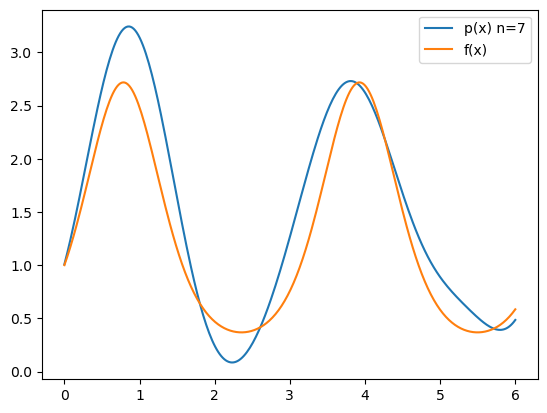

In [76]:
#Para n=7
dataxs, datays = generatedata(7, f)
aparams, bparams = computeparams(dataxs, datays) 
x=np.linspace(0,6,300)
datos=[triginterp(aparams,bparams,i) for i in x]
plt.plot(x,datos,label="p(x) n=7")
plt.plot(x,f(x),label="f(x)")
plt.legend()
plt.show()

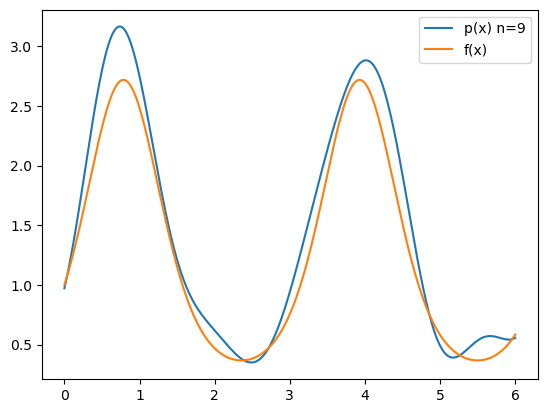

In [80]:
dataxs, datays = generatedata(9, f)
aparams, bparams = computeparams(dataxs, datays) 
x=np.linspace(0,6,300)
datos=[triginterp(aparams,bparams,i) for i in x]
plt.plot(x,datos,label="p(x) n=9")
plt.plot(x,f(x),label="f(x)")
plt.legend()
plt.show()